**THIS IS A FRAGMENT OF A COMPLETED NOTEBOOK. IT WILL NOT RUN BY ITSELF AND NEEDS VARIABLES LIKE df_all TO BE DEFINED BEFORE RUNNING.**

# Clustering

In [18]:
list(df_all.select_dtypes(include='number').columns)

['Year',
 'Ladder score',
 'Log GDP per capita',
 'Healthy life expectancy',
 'Social support',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

In [19]:
from sklearn.cluster import KMeans

start = df_all.groupby('Country name').mean()

X = start.select_dtypes(include='number')
X = X[['Ladder score', 'Log GDP per capita', 'Healthy life expectancy', 'Social support', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].copy()
 
model = KMeans(n_clusters=3)
model.fit(X)
y = model.predict(X)
y = y + 1

# remove the year column because its integer value is irrelevent to correlation with ladder score
to_plot = start.copy().reset_index().drop("Year", axis=1)
to_plot.loc[:, 'cluster'] = pd.Series(y)

## Review Countries in Each Cluster

In [20]:
cluster_sorted = to_plot.sort_values('Country name')

# highest cluster
highest = cluster_sorted.query("`Country name` == 'United States'")['cluster'].iloc[0]

# middle cluster
middle = cluster_sorted.query("`Country name` == 'Russia'")['cluster'].iloc[0]

# lowest cluster
lowest = cluster_sorted.query("`Country name` == 'South Africa'")['cluster'].iloc[0]

print("highest: ", list(cluster_sorted.query('cluster == @highest')['Country name'].unique()))
print("\nmiddle: ", list(cluster_sorted.query('cluster == @middle')['Country name'].unique()))
print("\nlowest: ", list(cluster_sorted.query('cluster == @lowest')['Country name'].unique()))

highest:  ['Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong S.A.R. of China', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Luxembourg', 'Maldives', 'Malta', 'Netherlands', 'New Zealand', 'North Cyprus', 'Norway', 'Panama', 'Portugal', 'Singapore', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan Province of China', 'United Kingdom', 'United States', 'Uruguay']

middle:  ['Albania', 'Algeria', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia', 'China', 'Colombia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Georgia', 'Guatemala', 'Honduras', 'Hungary', 'Indonesia', 'Iran', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Malaysia', 'Mauritius', 'Mexico',

## Cluster Breakdown by Regional Indicator

In [21]:
regional = pd.merge(cluster_sorted, df2021[['Country name', 'Regional indicator']], on='Country name')
unstacked = regional.groupby('Regional indicator')['cluster'].value_counts().unstack()
unstacked.rename(columns={highest: 'highest', middle: 'middle', lowest: 'lowest'}, inplace=True)

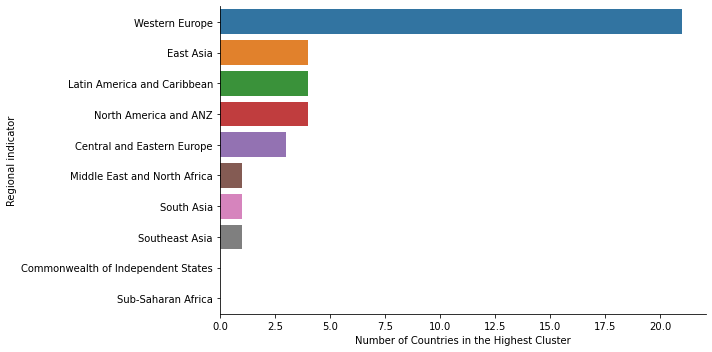

In [22]:
ax_h = sns.catplot(data = unstacked.reset_index().sort_values(by='highest', ascending=False), x='highest', y='Regional indicator', kind='bar', aspect=2)
ax_h.set(xlabel='Number of Countries in the Highest Cluster')

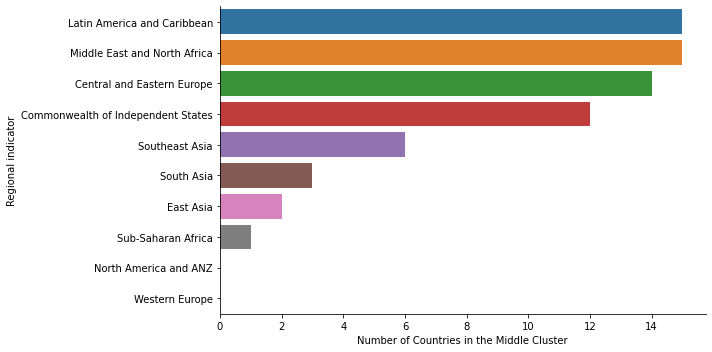

In [23]:
ax_m = sns.catplot(data = unstacked.reset_index().sort_values(by='middle', ascending=False), x='middle', y='Regional indicator', kind='bar', aspect=2)
ax_m.set(xlabel='Number of Countries in the Middle Cluster')

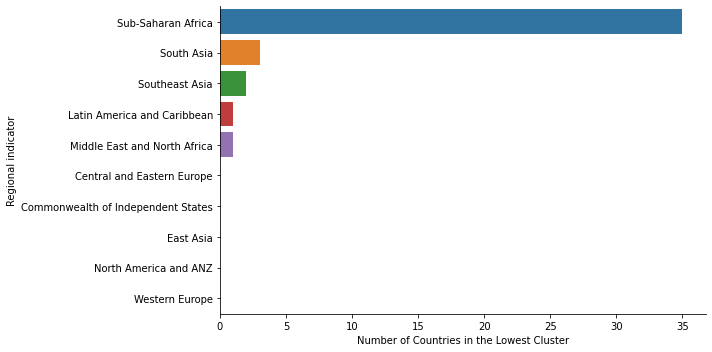

In [24]:
ax_l = sns.catplot(data = unstacked.reset_index().sort_values(by='lowest', ascending=False), x='lowest', y='Regional indicator', kind='bar', aspect=2)
ax_l.set(xlabel='Number of Countries in the Lowest Cluster')

## Pair Plot (Clustered)

FileNotFoundError: [Errno 2] No such file or directory: 'figures/pairplot_3clusters.png'

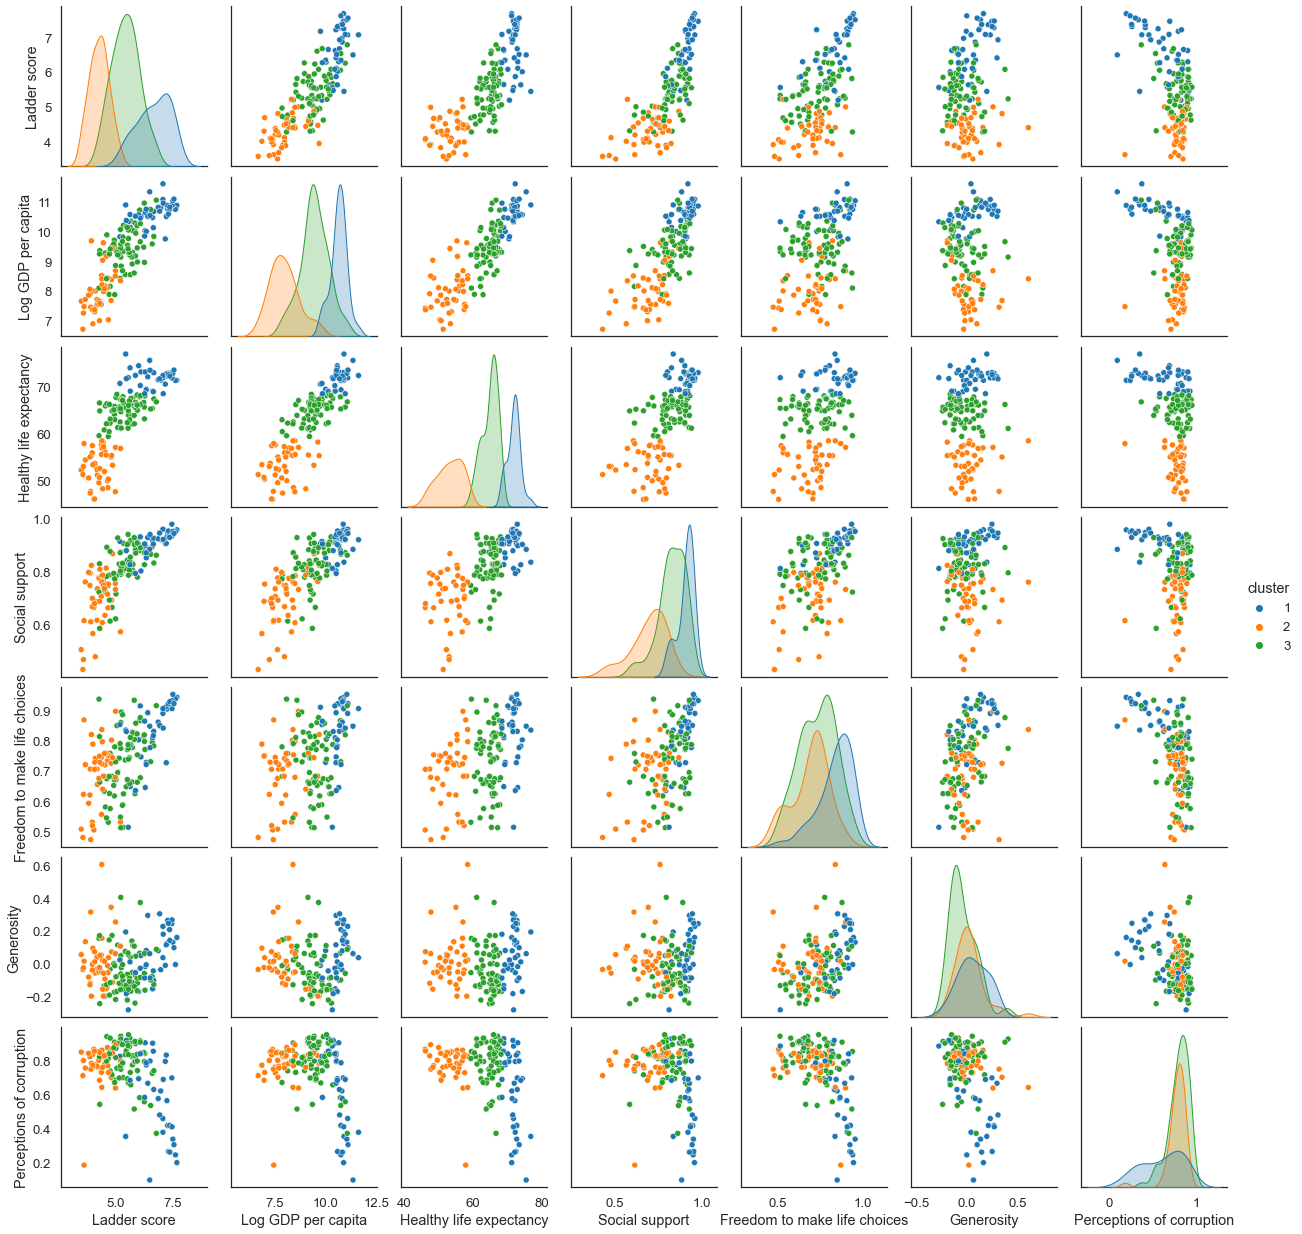

In [25]:
%matplotlib inline
sns.set(style="white", font_scale=1.2)

pair = sns.pairplot(data=to_plot, hue='cluster', palette=sns.color_palette('tab10', n_colors=3))

## Analysis Using Clusters

### Ladder Score Distribution

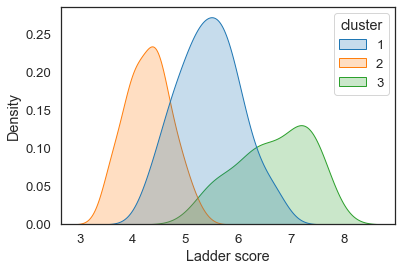

In [ ]:
ladder_dist = sns.kdeplot(data=to_plot, shade=True, x='Ladder score', hue='cluster', palette=sns.color_palette('tab10', n_colors=3))
ladder_dist.figure.savefig('figures/ladderdistribution.png', dpi=300, bbox_inches='tight')

### Perceptions of Corruption Distribution

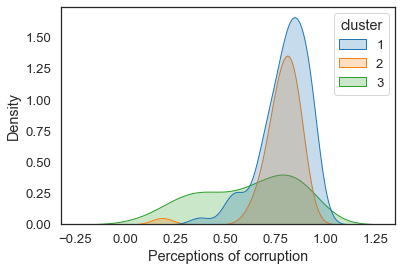

In [ ]:
corruption_dist = sns.kdeplot(data=to_plot, shade=True, x='Perceptions of corruption', hue='cluster', palette=sns.color_palette('tab10', n_colors=3))
corruption_dist.figure.savefig('figures/corruptiondistribution.png', dpi=300, bbox_inches='tight')

### Perceptions of corruption vs. Ladder score

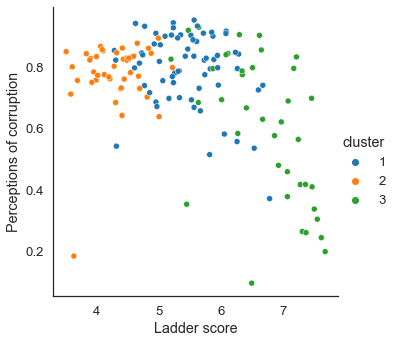

In [ ]:
ladder_corruption = sns.relplot(data=to_plot, x='Ladder score', y='Perceptions of corruption', hue='cluster', palette=sns.color_palette('tab10', n_colors=3))
ladder_corruption.savefig('figures/laddervscorruption.png', dpi=300, bbox_inches='tight')

### Perceptions of corruption vs. Log GDP per capita

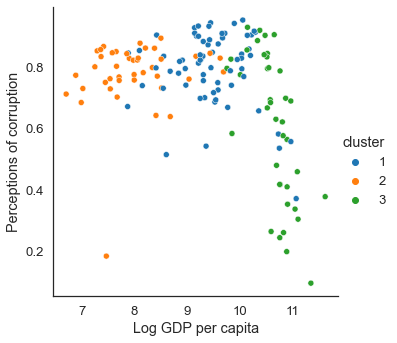

In [ ]:
gdp_corruption = sns.relplot(data=to_plot, x='Log GDP per capita', y='Perceptions of corruption', hue='cluster', palette=sns.color_palette('tab10', n_colors=3))
gdp_corruption.savefig('figures/gdpvscorruption.png', dpi=300, bbox_inches='tight')